In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import sqlite3


In [5]:
con = sqlite3.connect('accident_data_v1.0.0_2023 (1).db')

In [6]:
cur = con.cursor()

In [7]:
accident_data = cur.execute('''
            SELECT 
                *
            FROM
                accident
''').fetchall()

In [17]:
lsoa_data = cur.execute('''
            SELECT 
                *
            FROM
                lsoa
''').fetchall()

vehicle_data = cur.execute('''
            SELECT 
                *
            FROM
                vehicle
''').fetchall()

casualty_data = cur.execute('''
            SELECT 
                *
            FROM
                casualty
''').fetchall()

In [15]:
accident_info = cur.execute('PRAGMA table_info(accident)').fetchall()
vehicle_info = cur.execute('PRAGMA table_info(vehicle)').fetchall()
casualty_info = cur.execute('PRAGMA table_info(casualty)').fetchall()
lsoa_info = cur.execute('PRAGMA table_info(lsoa)').fetchall()

In [9]:
accident_info

[(0, 'accident_index', '', 0, None, 1),
 (1, 'accident_year', '', 0, None, 0),
 (2, 'accident_reference', '', 0, None, 0),
 (3, 'location_easting_osgr', '', 0, None, 0),
 (4, 'location_northing_osgr', '', 0, None, 0),
 (5, 'longitude', '', 0, None, 0),
 (6, 'latitude', '', 0, None, 0),
 (7, 'police_force', '', 0, None, 0),
 (8, 'accident_severity', '', 0, None, 0),
 (9, 'number_of_vehicles', '', 0, None, 0),
 (10, 'number_of_casualties', '', 0, None, 0),
 (11, 'date', '', 0, None, 0),
 (12, 'day_of_week', '', 0, None, 0),
 (13, 'time', '', 0, None, 0),
 (14, 'local_authority_district', '', 0, None, 0),
 (15, 'local_authority_ons_district', '', 0, None, 0),
 (16, 'local_authority_highway', '', 0, None, 0),
 (17, 'first_road_class', '', 0, None, 0),
 (18, 'first_road_number', '', 0, None, 0),
 (19, 'road_type', '', 0, None, 0),
 (20, 'speed_limit', '', 0, None, 0),
 (21, 'junction_detail', '', 0, None, 0),
 (22, 'junction_control', '', 0, None, 0),
 (23, 'second_road_class', '', 0, None,

In [16]:
accident_col = [tuples[1] for tuples in accident_info]
vehicle_col = [tuples[1] for tuples in vehicle_info]
lsoa_col = [tuples[1] for tuples in lsoa_info]
casualty_col = [tuples[1] for tuples in casualty_info]

In [11]:
accident_col

['accident_index',
 'accident_year',
 'accident_reference',
 'location_easting_osgr',
 'location_northing_osgr',
 'longitude',
 'latitude',
 'police_force',
 'accident_severity',
 'number_of_vehicles',
 'number_of_casualties',
 'date',
 'day_of_week',
 'time',
 'local_authority_district',
 'local_authority_ons_district',
 'local_authority_highway',
 'first_road_class',
 'first_road_number',
 'road_type',
 'speed_limit',
 'junction_detail',
 'junction_control',
 'second_road_class',
 'second_road_number',
 'pedestrian_crossing_human_control',
 'pedestrian_crossing_physical_facilities',
 'light_conditions',
 'weather_conditions',
 'road_surface_conditions',
 'special_conditions_at_site',
 'carriageway_hazards',
 'urban_or_rural_area',
 'did_police_officer_attend_scene_of_accident',
 'trunk_road_flag',
 'lsoa_of_accident_location']

In [12]:
columns = accident_col
accident_df = pd.DataFrame(accident_data, columns = columns)

In [13]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [18]:
columns2 = casualty_col
casualty_df = pd.DataFrame(casualty_data, columns = columns2)

In [19]:
columns3 = lsoa_col
lsoa_df = pd.DataFrame(lsoa_data, columns = columns3)

In [21]:
columns4 = vehicle_col
vehicle_df = pd.DataFrame(vehicle_data, columns = columns4)

<Axes: xlabel='age_of_driver', ylabel='Count'>

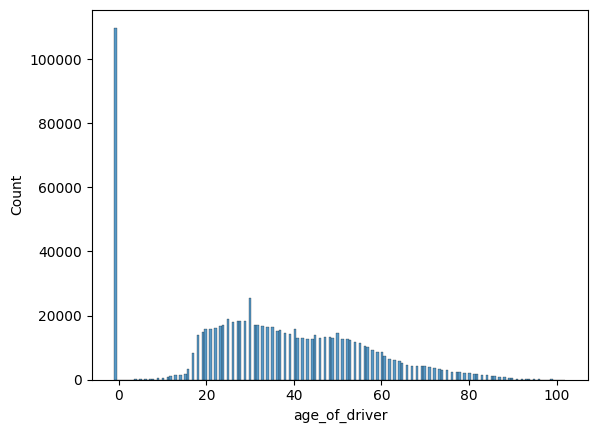

In [23]:
sns.histplot(vehicle_df['age_of_driver'])

(array([111021.,  47566., 172958., 184289., 132358., 107863.,  56414.,
         26079.,   9825.,    718.]),
 array([ -1. ,   9.3,  19.6,  29.9,  40.2,  50.5,  60.8,  71.1,  81.4,
         91.7, 102. ]),
 <BarContainer object of 10 artists>)

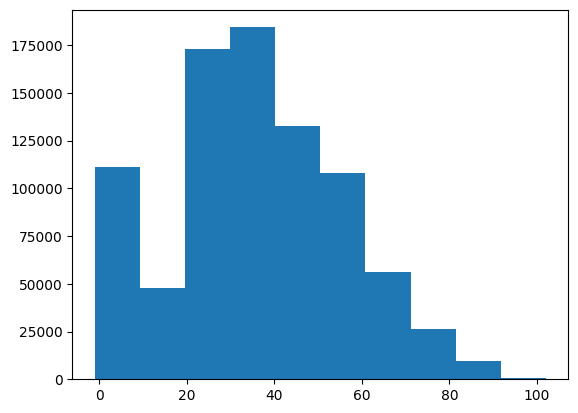

In [26]:
plt.hist(vehicle_df['age_of_driver'])

<Axes: xlabel='age_of_vehicle', ylabel='Count'>

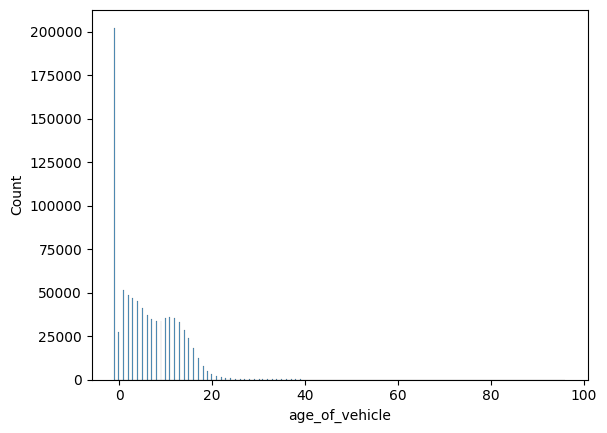

In [25]:
sns.histplot(vehicle_df['age_of_vehicle'])

(array([5.68941e+05, 2.63734e+05, 1.48150e+04, 1.01600e+03, 3.19000e+02,
        1.51000e+02, 7.60000e+01, 1.60000e+01, 1.30000e+01, 1.00000e+01]),
 array([-1. ,  8.7, 18.4, 28.1, 37.8, 47.5, 57.2, 66.9, 76.6, 86.3, 96. ]),
 <BarContainer object of 10 artists>)

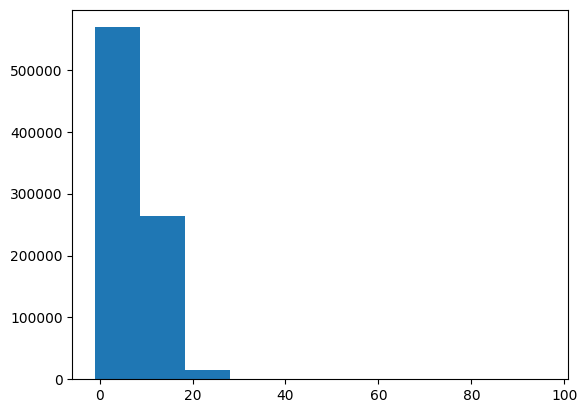

In [27]:
plt.hist(vehicle_df['age_of_vehicle'])

In [31]:
def get_iqr_outliers(series, mltple):
    import numpy as np
    q75, q25 = np.percentile(series, [75, 25])
    iqr = q75 - q25
    return (q25 - mltple *iqr, q75 + mltple *iqr)


In [32]:
upper_range, lower_range = get_iqr_outliers(vehicle_df['age_of_vehicle'], 3)

In [34]:
lower_range

40.0

In [28]:
import numpy as np

a = vehicle_df['age_of_vehicle']
q75, q25 = np.percentile(a, [75, 25])
iqr = q75 - q25
print(iqr)

10.0


In [29]:
print(q25 - 1.5*iqr, q75 + 1.5*iqr)

-15.0 25.0


<Axes: >

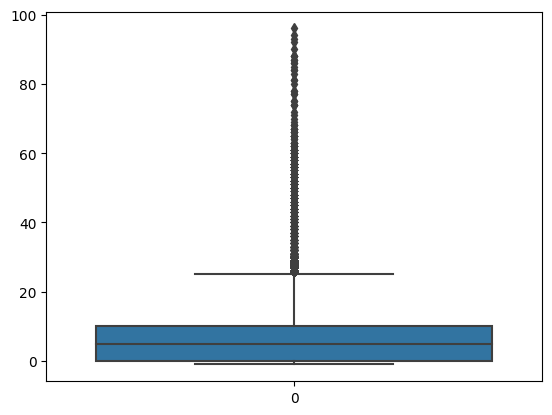

In [30]:
sns.boxplot(vehicle_df['age_of_vehicle'])

In [35]:
avg = np.mean(vehicle_df['age_of_vehicle'])
avg

5.749201204582312

In [36]:
absvalues = abs(vehicle_df['age_of_vehicle'].tolist()-avg)

In [37]:
absvalues

array([4.7492012, 6.7492012, 2.2507988, ..., 4.7492012, 6.7492012,
       3.7492012])

In [39]:
maxvalue = max(absvalues)
maxvalue

90.2507987954177

In [40]:
stdev = np.std(vehicle_df['age_of_vehicle'])
grubbs = maxvalue/stdev

In [41]:
grubbs

14.74426435050819

In [44]:
def get_critical(size, alpha): 
    tdist = stats.t.ppf(1-alpha/(2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(tdist))
    denominator = np.sqrt(size) * np.sqrt(size-2 + np.square(tdist))
    
    critical_value = numerator/denominator
    print('Grubbs critical value: {}'.format(critical_value))
    return critical_value

In [45]:
gcritical = get_critical(len(vehicle_df['age_of_vehicle']), 0.05)

Grubbs critical value: 5.422104454487083


In [47]:
from sklearn.neighbors import LocalOutlierFactor

In [48]:
lof_model = LocalOutlierFactor(contamination = 0.0025)

In [49]:
X = accident_df[['latitude','longitude']]

In [83]:
X_sans_na =X.dropna()

In [85]:
X_sans_na= X_sans_na.reset_index(drop=True)

In [55]:
outliers = lof_model.fit_predict(X.dropna())

In [91]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [92]:
X_sans_na['Outliers'] = outliers

In [93]:
X_sans_na

,latitude,longitude,Outliers
0,51.650061,-0.080107,1
1,51.522425,-0.173845,1
2,51.514096,-0.052969,1
3,51.624832,-0.060658,1
4,51.573408,-0.072372,1
...,...,...,...
461221,56.473539,-2.926320,1
461222,55.802353,-4.267565,1
461223,57.186317,-2.271903,1
461224,55.950940,-3.968753,1


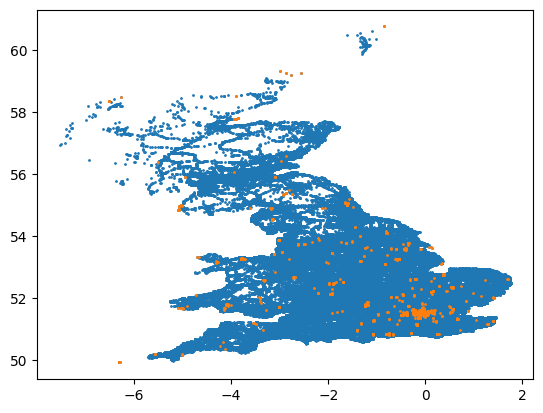

In [99]:
plt.scatter(x=X_sans_na['longitude'], y = X_sans_na['latitude'], s = 1 )
plt.scatter(x=X_sans_na[X_sans_na['Outliers']==-1].longitude, y = X_sans_na[X_sans_na['Outliers']==-1].latitude, s = 1)

In [122]:
accident_df_num = accident_df.select_dtypes(exclude = object).dropna().reset_index()

In [123]:
accident_df_num

,index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
0,0,2017,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,...,0,0,4,1,1,0,0,1,1,2
1,1,2017,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,...,0,0,4,1,2,0,0,1,1,2
2,2,2017,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,...,0,0,4,1,1,0,0,1,1,2
3,3,2017,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,...,0,4,4,2,2,0,0,1,1,2
4,4,2017,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,...,0,5,4,1,2,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461221,461347,2020,343034.0,731654.0,-2.926320,56.473539,99,2,2,1,...,0,0,1,1,1,0,0,1,1,-1
461222,461348,2020,257963.0,658891.0,-4.267565,55.802353,99,3,1,1,...,0,0,1,1,1,0,0,1,2,-1
461223,461349,2020,383664.0,810646.0,-2.271903,57.186317,99,2,2,1,...,0,0,1,1,1,0,0,2,1,-1
461224,461350,2020,277161.0,674852.0,-3.968753,55.950940,99,3,2,1,...,0,0,1,1,1,0,0,1,2,-1


In [102]:
from sklearn.ensemble import IsolationForest

In [116]:
ranst= np.random.RandomState(0)
iforest = IsolationForest(max_samples = 100, random_state =ranst, contamination = 0.01)

In [124]:
iforest.fit(accident_df_num)

C:\Users\Gbadamosi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, max_samples=100,
                random_state=RandomState(MT19937) at 0x1A787964B40)

In [125]:
if_scors = iforest.decision_function(accident_df_num)

In [126]:
if_anomalies = iforest.predict(accident_df_num)
if_anomalies = pd.Series(if_anomalies).replace([-1,1], [1,0])

In [121]:
if_anomalies

0         0
1         0
2         0
3         0
4         0
         ..
461221    0
461222    0
461223    0
461224    0
461225    0
Length: 461226, dtype: int32

In [127]:
if_anomalies = accident_df_num[if_anomalies == 1]

In [128]:
if_anomalies

,index,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
14,14,2017,553430.0,189040.0,0.212939,51.579345,1,3,2,1,...,0,9,7,9,9,9,9,1,2,2
356,356,2017,529410.0,183460.0,-0.135555,51.535222,1,2,2,1,...,0,4,4,9,9,9,9,1,2,2
505,505,2017,548880.0,174700.0,0.141272,51.451716,1,3,1,1,...,0,8,1,9,9,9,9,1,2,2
561,561,2017,529010.0,178560.0,-0.143111,51.491278,1,3,1,1,...,0,9,1,9,9,9,9,1,2,2
616,616,2017,529010.0,181560.0,-0.142014,51.518238,1,3,2,1,...,0,9,7,9,9,9,9,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461176,461302,2020,268116.0,656638.0,-4.104624,55.785004,99,3,2,1,...,2,5,4,8,2,0,0,1,2,-1
461189,461315,2020,153451.0,829390.0,-6.093206,57.288332,99,2,1,1,...,0,0,1,2,2,0,0,2,2,-1
461194,461320,2020,366456.0,748951.0,-2.548388,56.631179,99,2,2,5,...,0,0,6,1,4,0,0,2,1,-1
461204,461330,2020,327696.0,1019412.0,-3.262293,59.055529,99,3,1,2,...,0,0,6,2,2,0,0,2,1,-1


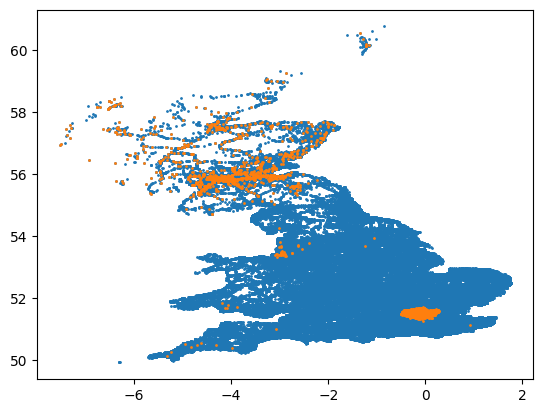

In [129]:
plt.scatter(x=accident_df_num['longitude'], y = accident_df_num['latitude'], s = 1 )
plt.scatter(x=if_anomalies['longitude'], y = if_anomalies['latitude'], s = 1)

In [130]:
accident_df

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461347,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,0,1,1,1,0,0,1,1,-1,-1
461348,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,0,1,1,1,0,0,1,2,-1,-1
461349,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,0,1,1,1,0,0,2,1,-1,-1
461350,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,0,1,1,1,0,0,1,2,-1,-1


In [160]:
accident_df['converted_time'] = pd.DatetimeIndex(accident_df['time'])


In [159]:
pd.DatetimeIndex()

In [145]:
from hampel import hampel

In [175]:
ts = pd.to_numeric(accident_df['number_of_casualties'])

In [176]:
ts

0         3
1         1
2         1
3         1
4         1
         ..
461347    1
461348    1
461349    1
461350    1
461351    1
Name: number_of_casualties, Length: 461352, dtype: int64

AttributeError: 'list' object has no attribute 'plot'

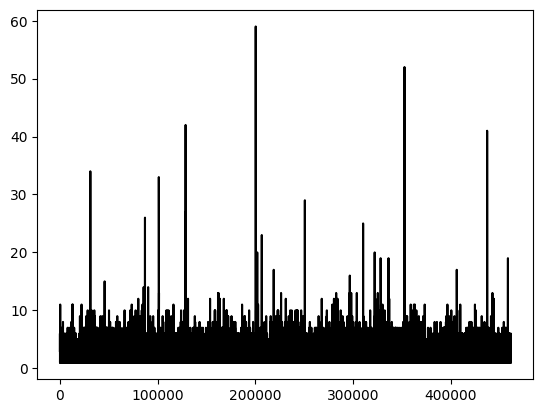

In [177]:
ts_cleaned = hampel(ts, window_size = 20, n = 3)
ts.plot(style = 'k-')
ts_cleaned.plot(style = 'r-')
plt.show()

In [180]:
ts_cleaned = pd.Series(ts_cleaned)

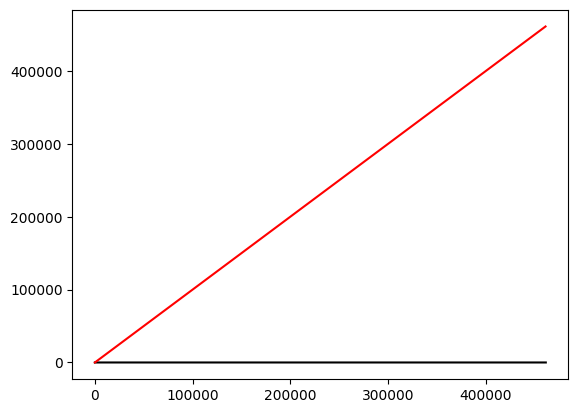

In [181]:
ts.plot(style = 'k-')
ts_cleaned.plot(style = 'r-')
plt.show()

(array([13437.,  7477., 17948., 62912., 50786., 66211., 83577., 86425.,
        45717., 26862.]),
 array([19561.        , 19561.09993056, 19561.19986111, 19561.29979167,
        19561.39972222, 19561.49965278, 19561.59958333, 19561.69951389,
        19561.79944444, 19561.899375  , 19561.99930556]),
 <BarContainer object of 10 artists>)

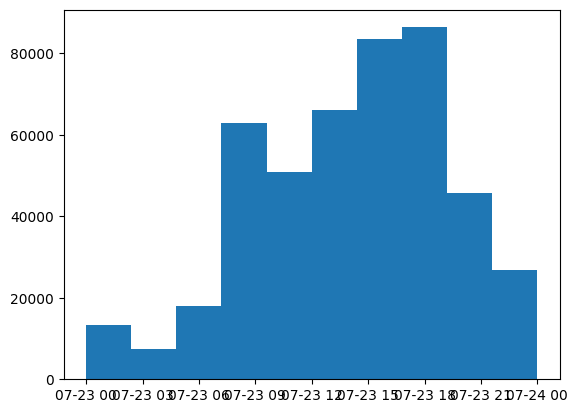

In [147]:
plt.hist(accident_df['converted_time'] )

In [171]:
type(accident_df['accident_index'][1])

str

In [149]:
accident_df['time'] 

0         03:12
1         01:30
2         00:30
3         01:11
4         01:42
          ...  
461347    14:30
461348    15:05
461349    12:42
461350    14:00
461351    13:50
Name: time, Length: 461352, dtype: object

In [151]:
list1

[Timestamp('2023-07-23 03:12:00'),
 Timestamp('2023-07-23 01:30:00'),
 Timestamp('2023-07-23 00:30:00'),
 Timestamp('2023-07-23 01:11:00'),
 Timestamp('2023-07-23 01:42:00'),
 Timestamp('2023-07-23 03:31:00'),
 Timestamp('2023-07-23 04:07:00'),
 Timestamp('2023-07-23 05:20:00'),
 Timestamp('2023-07-23 03:18:00'),
 Timestamp('2023-07-23 03:00:00'),
 Timestamp('2023-07-23 05:00:00'),
 Timestamp('2023-07-23 06:55:00'),
 Timestamp('2023-07-23 10:45:00'),
 Timestamp('2023-07-23 08:15:00'),
 Timestamp('2023-07-23 01:15:00'),
 Timestamp('2023-07-23 10:25:00'),
 Timestamp('2023-07-23 16:48:00'),
 Timestamp('2023-07-23 05:10:00'),
 Timestamp('2023-07-23 18:06:00'),
 Timestamp('2023-07-23 16:55:00'),
 Timestamp('2023-07-23 16:49:00'),
 Timestamp('2023-07-23 17:55:00'),
 Timestamp('2023-07-23 15:05:00'),
 Timestamp('2023-07-23 18:07:00'),
 Timestamp('2023-07-23 19:10:00'),
 Timestamp('2023-07-23 20:20:00'),
 Timestamp('2023-07-23 19:35:00'),
 Timestamp('2023-07-23 19:25:00'),
 Timestamp('2023-07-

In [182]:
from numpy import quantile, where
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
model = LocalOutlierFactor(n_neighbors = 30, contamination =.1 )
y_pred = model.fit_predict(long, lat)
LOF_scores = model.negative_otlier_factor_
LOF_pred = pd.Series(y_pred).replace([-1,1], [1,0])
LOF_anomalies = thedata[LOF_pred == 1]

In [ ]:
plt.figure(figsize = (6,6))
plt.scatter(thedata['x'], thedata['y'], c = 'white', s = 20, edgecolor = 'k')
plt.scatter(LOF_anomalies['x'], LOF_anomalies['y'], c = 'blue')